In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gradiente Descendente

Esse notebook irá demonstrar a aplicação do algoritmo Gradiente Descendente.

O Gradiente Descendente é um algoritmo de otimização fundamental em Machine Learning, usado para minimizar funções de custo (erros) em modelos, ajustando iterativamente os parâmetros na direção da descida mais acentuada da função.



In [2]:
def calculate_predicted_values(real_x : np.array, intercept : float, slope : float) -> np.array:
    return real_x * slope + intercept

def squared_sum_residuals(real_y : np.array, predicted_y : np.array) -> float:
    return np.sum((real_y - predicted_y) ** 2)

def derivated_sum_squared_residuals_intercept(real_y, predicted_y):
    return np.sum(-2 * (real_y - predicted_y))

def derivated_sum_squared_residuals_slope(real_x, real_y, predicted_y):
    return np.sum(-2 * real_x * (real_y - predicted_y))

def get_tan_line_values(x_range: np.ndarray, current_intercept: float, current_cost: float, gradient: float):
    return current_cost + gradient * (x_range - current_intercept)

## Letra A

In [13]:
def plot_iteration_status(ax1, ax2, 
                          x_real, y_real, y_pred, 
                          intercept_val, cost_val, 
                          b_vals, costs_curve, 
                          tan_x, tan_y, 
                          iteration):
    ax1.clear()
    ax2.clear()

    # --- Gráfico 1: Regressão Linear ---
    for x, y_true, y_p in zip(x_real, y_real, y_pred):
        ax1.plot([x, x], [y_p, y_true], color='red', linestyle='--', linewidth=1, zorder=1)
    ax1.scatter(x_real, y_real, color='blue')
    ax1.plot(x_real, y_pred, color='red', linewidth=1.5, alpha=0.7)
    ax1.set_title("Ajuste da Reta")
    handles, labels = ax1.get_legend_handles_labels()
    ax1.grid(True, alpha=0.5)

    # --- Gráfico 2: Curva de Custo ---
    ax2.plot(b_vals, costs_curve, color='gray', linestyle='--', alpha=0.7, label='Curva de Custo')
    ax2.scatter(intercept_val, cost_val, color='red', s=100, zorder=5, label='Custo Atual')
    ax2.plot(tan_x, tan_y, color='green', linewidth=1.5, label='Tangente')
    ax2.set_title(f"Gradiente (Custo: {cost_val:.2f})")
    ax2.set_xlabel("Intercepto")
    ax2.legend(loc='upper center')
    ax2.grid(True, alpha=0.3)

    plt.suptitle(f"Iteração {iteration}")
    plt.draw()
    plt.show(0.5)

In [11]:
def gradient_descent(
        initial_intercept: float,
        fixed_slope: float,
        real_dots: np.ndarray,
        learn_rate: float,
        max_iterations: int,
) -> np.ndarray :
    
    current_intercept: float = initial_intercept

    history = []

    for i in range(max_iterations):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
        x_real: np.ndarray = real_dots[:, 0]
        y_real: np.ndarray = real_dots[:, 1]
        y_pred: np.ndarray = calculate_predicted_values(
            x_real,
            current_intercept,
            fixed_slope,
        )
        
        b_vals = np.linspace(initial_intercept - 0.5, initial_intercept + 1.5, 100)
        costs_curve = [squared_sum_residuals(y_real, calculate_predicted_values(x_real, b, fixed_slope)) for b in b_vals]
        
        current_cost: float = squared_sum_residuals(y_real, y_pred)
        history.append((current_intercept, current_cost))
        gradient_intercept: float = derivated_sum_squared_residuals_intercept(
            y_real,
            y_pred,
        )

        old_intercept = current_intercept
        
        tan_range = np.linspace(old_intercept - 0.5, old_intercept + 0.5, 10)
        tan_line = get_tan_line_values(tan_range, old_intercept, current_cost, gradient_intercept)

        plot_iteration_status(
            ax1, ax2, 
            x_real, y_real, y_pred, 
            old_intercept, current_cost, 
            b_vals, costs_curve, 
            tan_range, tan_line, 
            i + 1
        )

        step_size: float = gradient_intercept * learn_rate
        current_intercept -= step_size

        print('Interação | Old Intercept | Step Size | New Intercept')
        print(f"{i+1:<3} | {old_intercept:<10.4f} | {step_size:<10.4f} | {current_intercept:<10.4f}")        

        if (-step_size < 0.001):
            print(f'Chegou ao mínimo na interação {i+1}')
            break
    
    return current_intercept, history

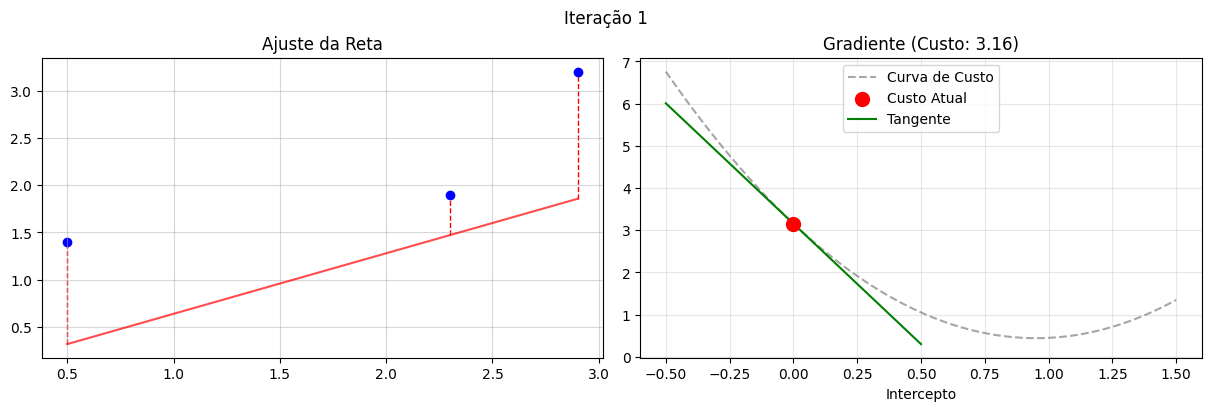

Interação | Old Intercept | Step Size | New Intercept
1   | 0.0000     | -0.5704    | 0.5704    


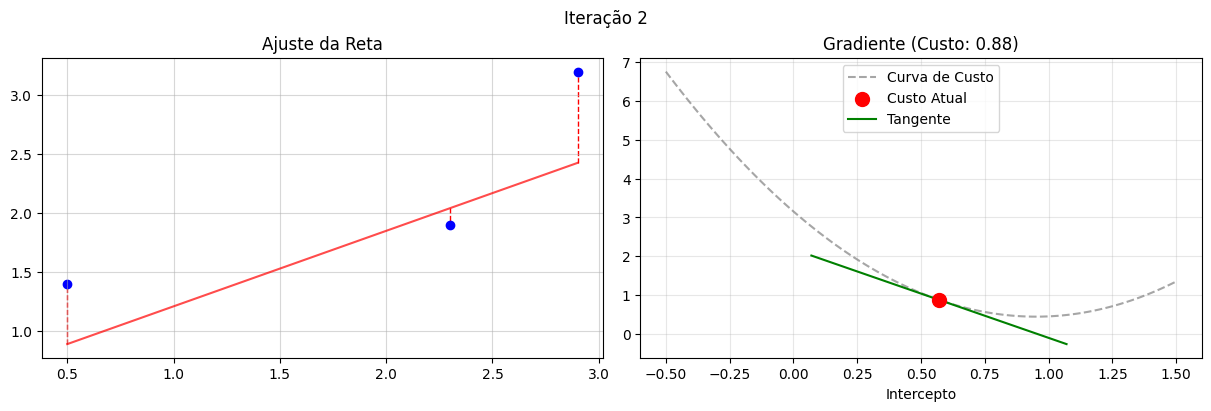

Interação | Old Intercept | Step Size | New Intercept
2   | 0.5704     | -0.2282    | 0.7986    


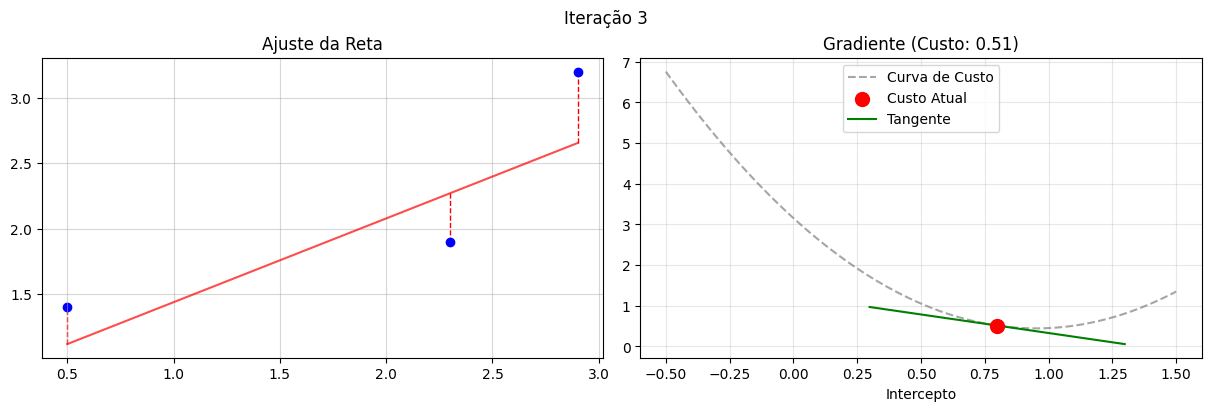

Interação | Old Intercept | Step Size | New Intercept
3   | 0.7986     | -0.0913    | 0.8898    


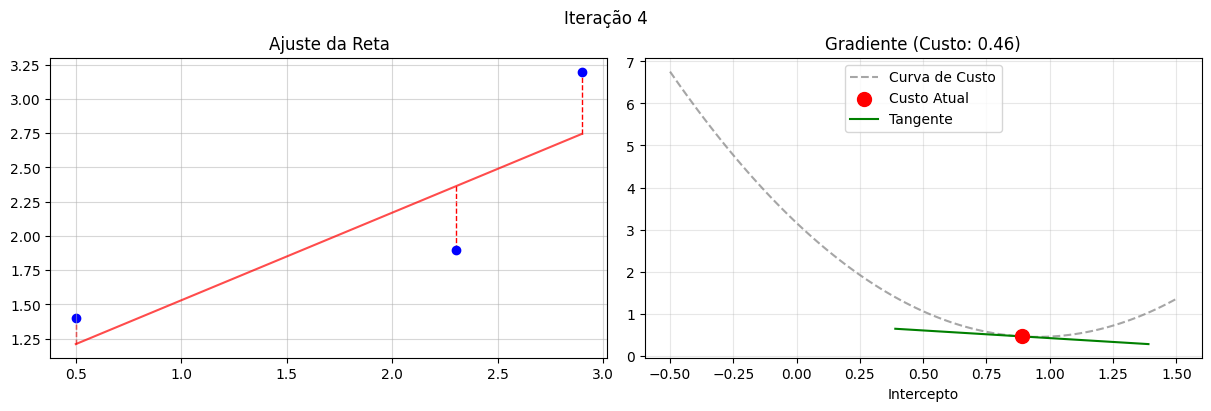

Interação | Old Intercept | Step Size | New Intercept
4   | 0.8898     | -0.0365    | 0.9263    


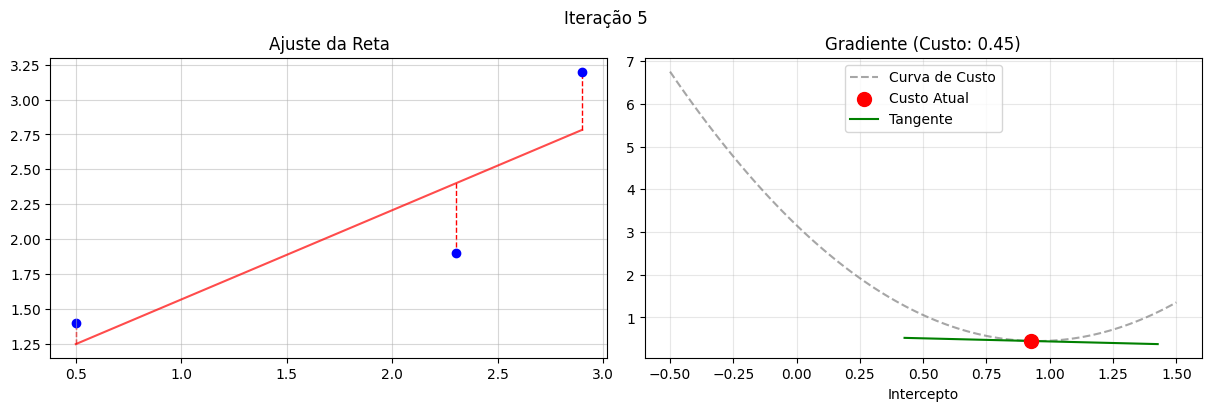

Interação | Old Intercept | Step Size | New Intercept
5   | 0.9263     | -0.0146    | 0.9409    


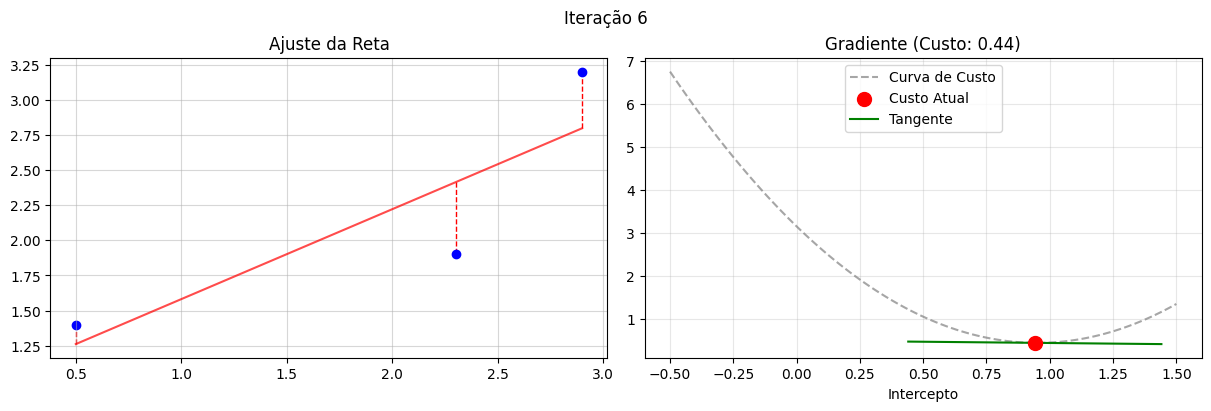

Interação | Old Intercept | Step Size | New Intercept
6   | 0.9409     | -0.0058    | 0.9468    


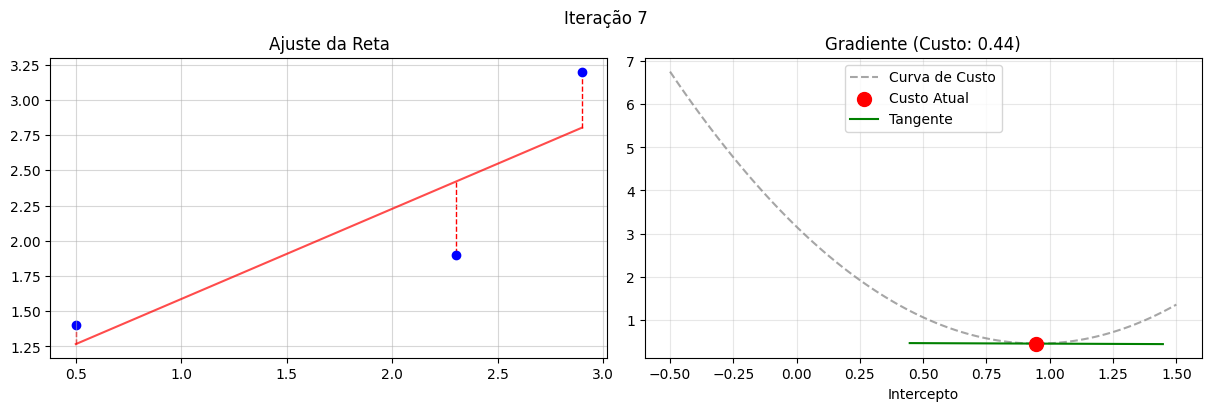

Interação | Old Intercept | Step Size | New Intercept
7   | 0.9468     | -0.0023    | 0.9491    


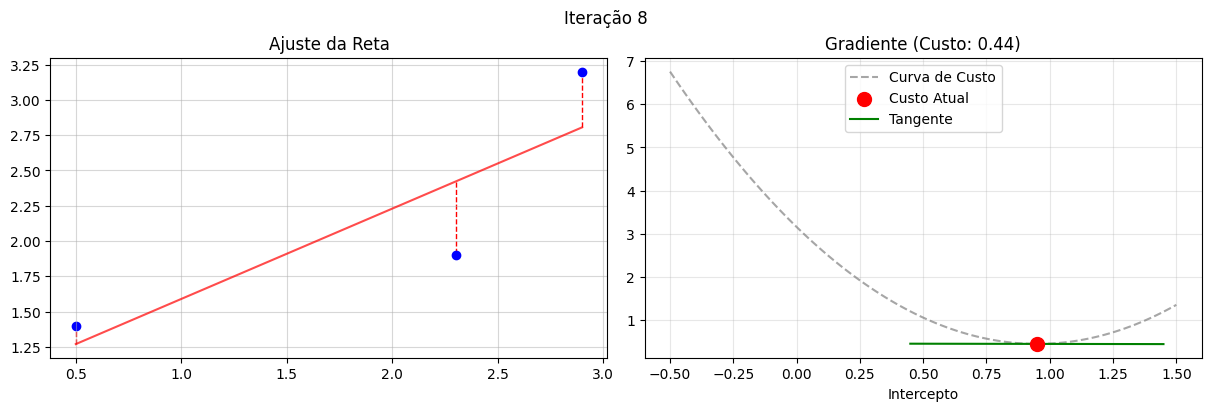

Interação | Old Intercept | Step Size | New Intercept
8   | 0.9491     | -0.0009    | 0.9500    
Chegou ao mínimo na interação 8


In [ ]:
fixed_slope = 0.64
initial_intercept = 0.0
learning_rate = 0.1
real_dots = np.array([[0.5, 1.4], [2.3, 1.9],[2.9, 3.2]])
current_intercept, history_intercept = gradient_descent(
    initial_intercept, 
    fixed_slope, 
    real_dots, 
    learning_rate, 
    100)

## Questão B

Método Estocástico

In [62]:
def plot_sgd_status(ax1, ax2, 
                    x_real, y_real,
                    x_sample, y_sample,
                    curr_b, curr_m, global_cost,
                    b_vals, costs_curve,
                    gradient_intercept, 
                    iteration):
    ax1.clear()
    ax2.clear()

    # --- ESQUERDA: Regressão (Espaço dos Dados) ---
    # Todos os pontos (fundo)
    ax1.scatter(x_real, y_real, color='green', alpha=0.3, label='População')
    
    # Ponto Sorteado (Laranja e Grande)
    ax1.scatter(x_sample, y_sample, color='orange', s=150, edgecolors='black', zorder=10, label='Amostra SGD')
    
    # Reta Atual
    x_line = np.linspace(min(x_real)-1, max(x_real)+1, 100)
    y_line = calculate_predicted_values(x_line, curr_b, curr_m)
    ax1.plot(x_line, y_line, color='teal', linewidth=2.5, label=f'Modelo (b={curr_b:.2f})')
    
    # Linha de Erro (Resíduo) da amostra
    y_pred_sample = calculate_predicted_values(x_sample, curr_b, curr_m)
    ax1.plot([x_sample, x_sample], [y_pred_sample, y_sample], color='red', linestyle='--', linewidth=2)

    ax1.set_title(f"Iteração {iteration}: Ajuste pelo Ponto Laranja")
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)

    # --- DIREITA: Curva de Custo 2D (Espaço dos Parâmetros) ---
    # Curva Global (A verdade que queremos alcançar)
    ax2.plot(b_vals, costs_curve, color='gray', linestyle='--', alpha=0.5, label='Custo Global (Real)')
    
    # Onde estamos na curva global
    ax2.scatter(curr_b, global_cost, color='red', s=100, zorder=10, label='Intercepto Atual')

    # A "Força" do SGD (Gradiente Local)
    # Visualizamos o gradiente calculado APENAS com o ponto sorteado, projetado sobre o custo atual.
    # Note: Essa reta pode ter inclinação muito diferente da parábola cinza!
    tan_range = np.linspace(curr_b - 1, curr_b + 1, 10)
    tan_line = get_tan_line_values(tan_range, curr_b, global_cost, gradient_intercept)
    
    color_grad = 'orange' if gradient_intercept > 0 else 'purple' # Muda cor conforme direção
    ax2.plot(tan_range, tan_line, color=color_grad, linewidth=2.5, label='Gradiente Estocástico')

    ax2.set_title(f"Custo Global vs Gradiente Local")
    ax2.set_xlabel("Intercepto (b)")
    ax2.set_ylabel("Erro")
    ax2.legend(loc='upper center', fontsize='small')
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle("Stochastic Gradient Descent")
    plt.draw()
    plt.pause(0.5)

In [69]:
def stochastic_gradient_descent(
        initial_intercept: float,
        initial_slope: float,
        real_dots: np.ndarray,
        learn_rate: float,
        max_iterations: int,
) -> np.ndarray :
    
    current_intercept: float = initial_intercept
    current_slope: float = initial_slope

    history = []

    for i in range(max_iterations):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
        x_real: np.ndarray = real_dots[:, 0]
        y_real: np.ndarray = real_dots[:, 1]
        
        b_vals = np.linspace(initial_intercept - 0.5, initial_intercept + 1.5, 100)
        costs_curve = [squared_sum_residuals(y_real, calculate_predicted_values(x_real, b, current_slope)) for b in b_vals]

        idx = np.random.randint(0, len(real_dots))
        x_sample = x_real[idx]
        y_sample = y_real[idx]
        
        # 2. Gradiente Estocástico (baseado em 1 ponto)
        y_pred_sample = calculate_predicted_values(x_sample, current_intercept, current_slope)
        gradient_intercept = derivated_sum_squared_residuals_intercept(y_sample, y_pred_sample)
        gradient_slope = derivated_sum_squared_residuals_slope(x_sample, y_sample, y_pred_sample)
        
        # Custo Global (apenas para plotar o ponto vermelho na altura certa)
        y_pred_total = calculate_predicted_values(x_real, current_intercept, current_slope)
        global_cost = squared_sum_residuals(y_real, y_pred_total)
    
        history.append((current_intercept, global_cost))

        plot_sgd_status(
            ax1, ax2,
            x_real, y_real,
            x_sample, y_sample,
            current_intercept, current_slope,
            global_cost,
            b_vals, costs_curve,
            gradient_intercept,
            i + 1
        )

        old_intercept = current_intercept

        step_size_intercept: float = gradient_intercept * learn_rate
        step_size_slope: float = gradient_slope * learn_rate
        current_intercept -= step_size_intercept
        current_slope -= step_size_slope

        print('Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope')
        print(f"{i+1:<3} | {old_intercept:<10.4f} | {step_size_intercept:<10.4f} | {current_intercept:<10.4f} | {step_size_slope:<10.4f} | {current_slope:<10.4f}")        

        if ((-step_size_intercept or -step_size_slope) < 0.001):
            print(f'Chegou ao mínimo na interação {i+1}')
            break
    
    return current_intercept, history

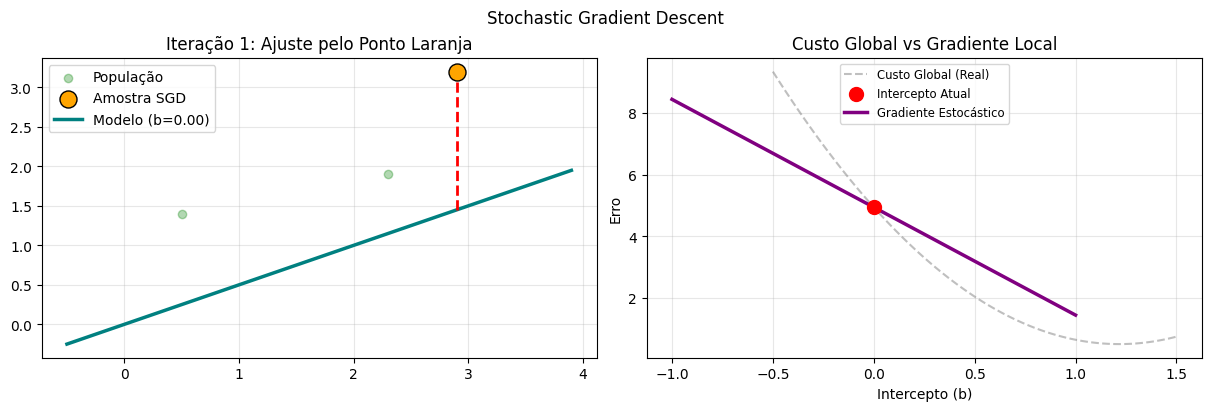

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
1   | 0.0000     | -0.0350    | 0.0350     | -0.1015    | 0.6015    


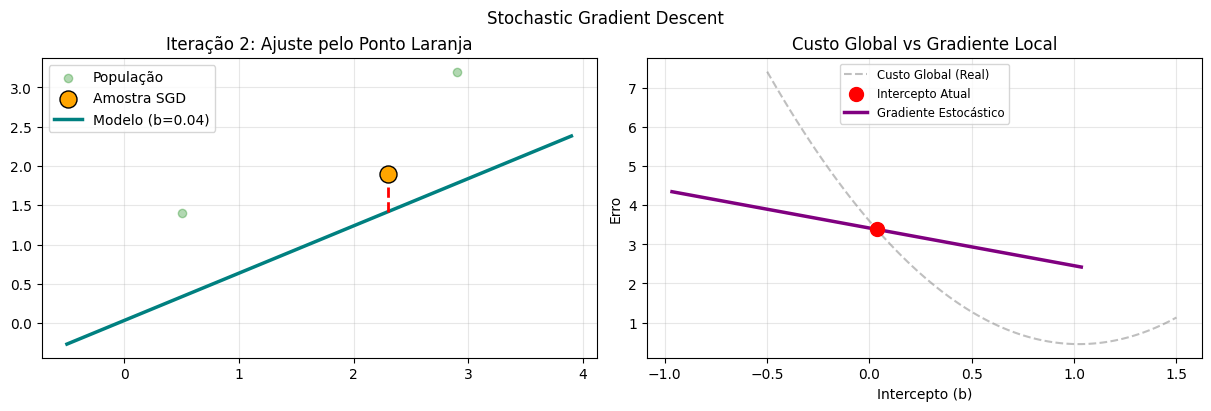

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
2   | 0.0350     | -0.0096    | 0.0446     | -0.0222    | 0.6237    


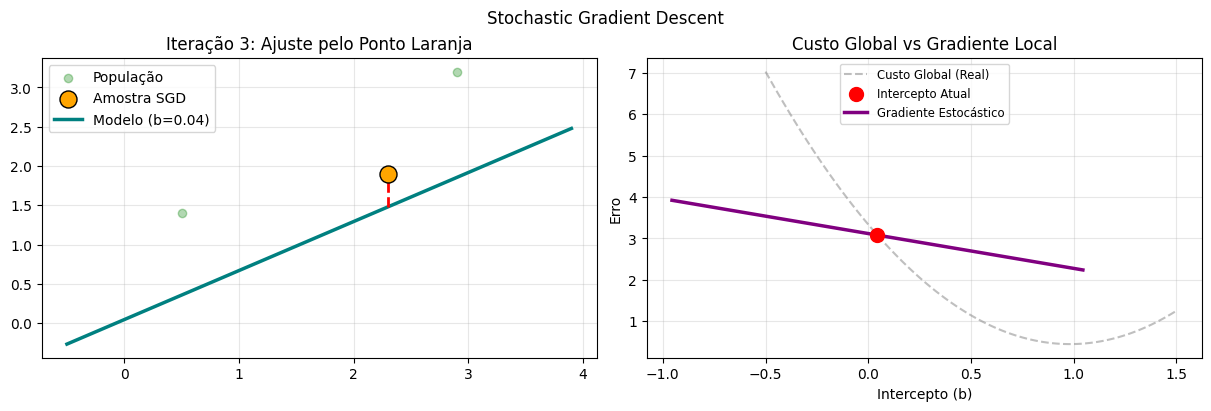

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
3   | 0.0446     | -0.0084    | 0.0531     | -0.0194    | 0.6430    


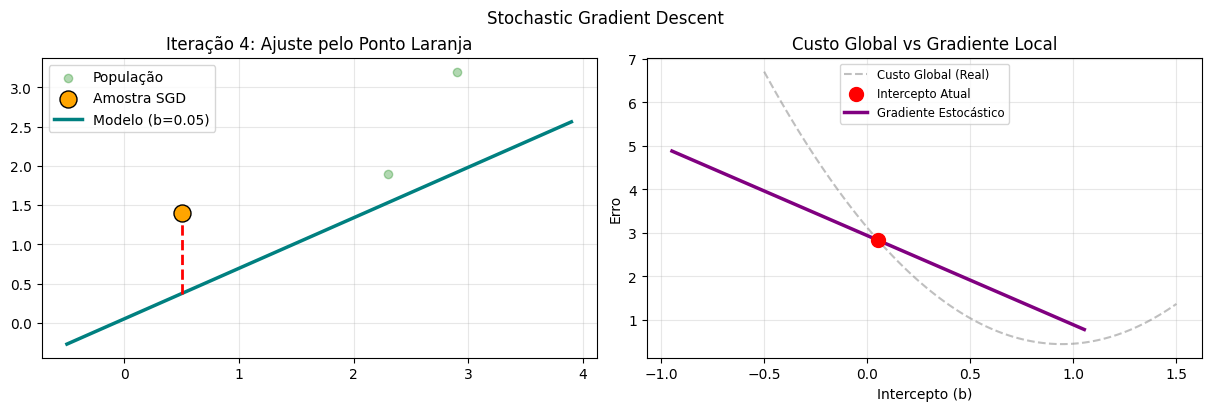

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
4   | 0.0531     | -0.0205    | 0.0736     | -0.0103    | 0.6533    


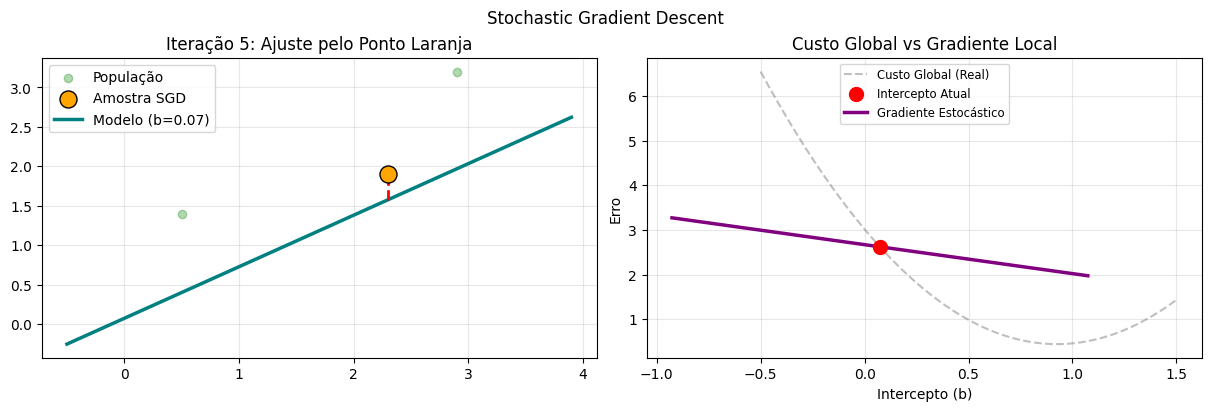

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
5   | 0.0736     | -0.0065    | 0.0800     | -0.0149    | 0.6682    


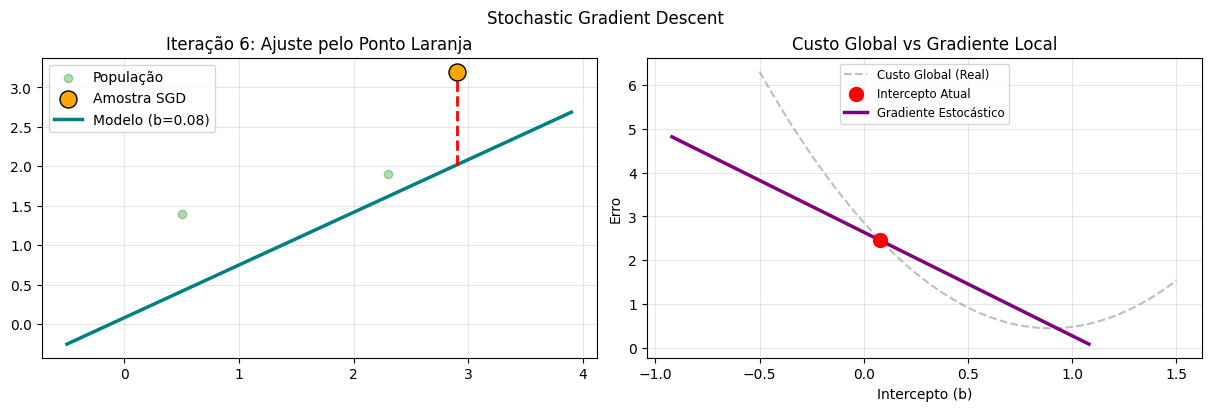

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
6   | 0.0800     | -0.0236    | 0.1037     | -0.0686    | 0.7367    


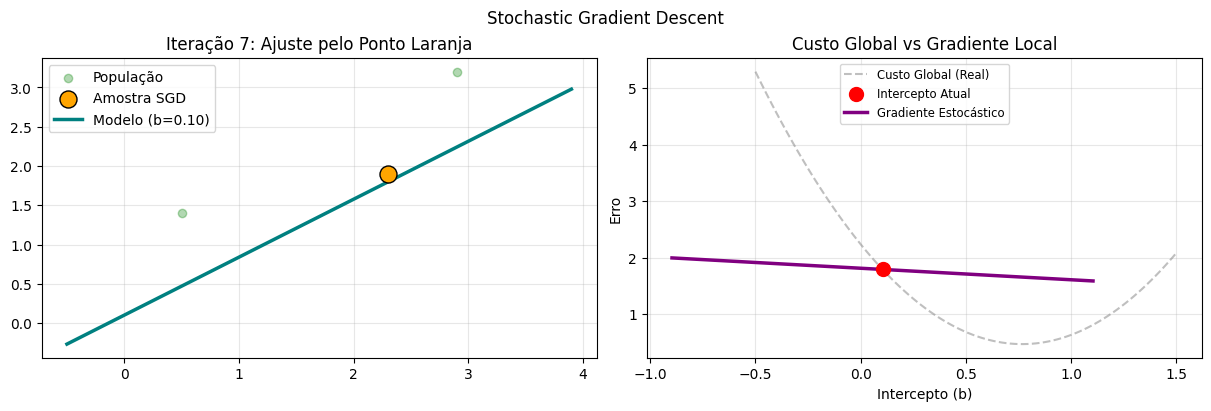

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
7   | 0.1037     | -0.0020    | 0.1057     | -0.0047    | 0.7414    


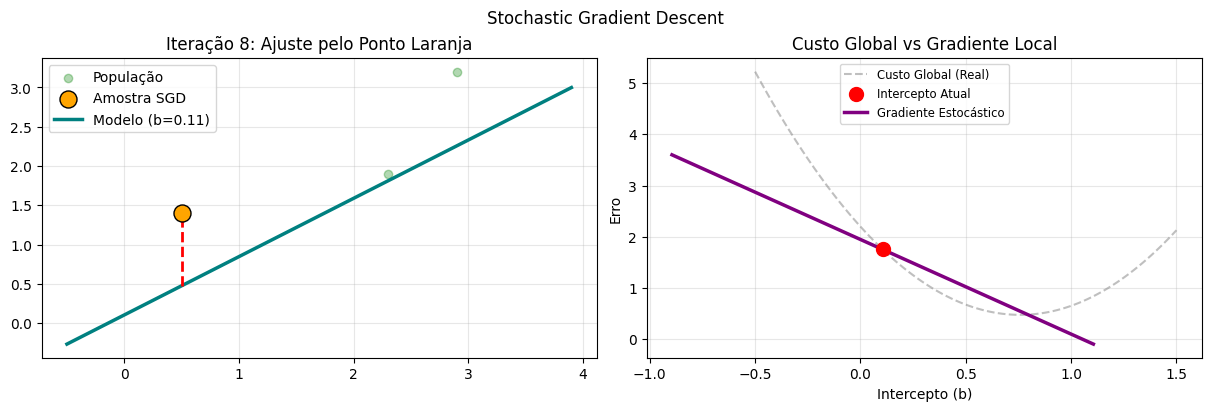

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
8   | 0.1057     | -0.0185    | 0.1242     | -0.0092    | 0.7507    


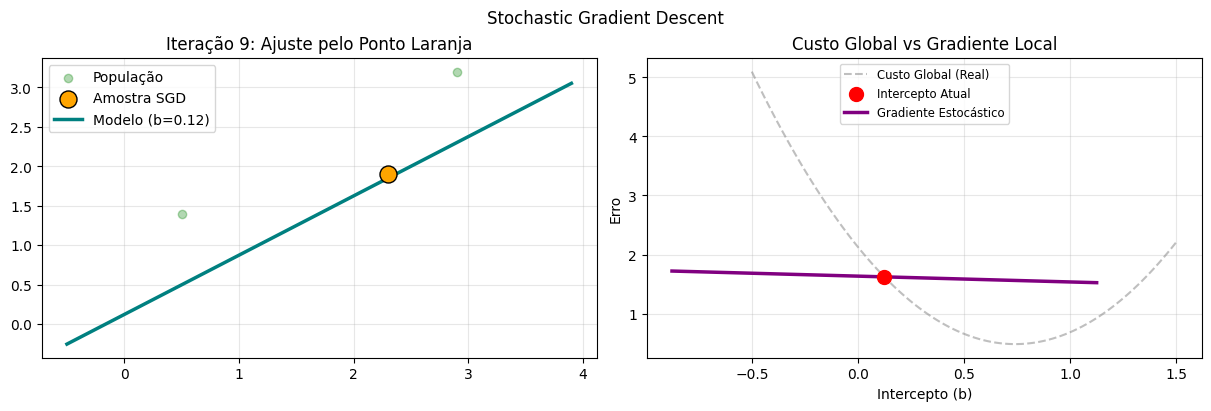

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
9   | 0.1242     | -0.0010    | 0.1252     | -0.0023    | 0.7529    
Chegou ao mínimo na interação 9


(np.float64(0.12517632038398618),
 [(0.0, np.float64(4.947500000000001)),
  (np.float64(0.035), np.float64(3.3827648875000005)),
  (np.float64(0.044631000000000004), np.float64(3.0800163025084952)),
  (np.float64(0.053050420200000004), np.float64(2.8310091745694335)),
  (np.float64(0.0735592521314), np.float64(2.622251744320998)),
  (np.float64(0.08003762949718979), np.float64(2.4498951311621755)),
  (np.float64(0.10368297918595903), np.float64(1.7925973132640345)),
  (np.float64(0.10571918003687528), np.float64(1.7523131791726323)),
  (np.float64(0.12419054217192223), np.float64(1.6212989235241753))])

In [70]:
real_dots = np.array([[0.5, 1.4], [2.3, 1.9],[2.9, 3.2]])

stochastic_gradient_descent(
        initial_intercept=0.0,
        initial_slope=0.5,    # Começa com slope ruim
        real_dots=real_dots,
        learn_rate=0.01,      # Taxa conservadora
        max_iterations=60
    )

Método Mini-batch


In [20]:
def minibatch_gradient_descent(
    initial_intercept: float,
    slope: float,
    real_dots: np.ndarray,
    learn_rate: float,
    max_iterations: int,
    batch_size: int = 2 # <--- Definido como padrão, mas vamos passar explicitamente
):
    current_intercept = initial_intercept
    history = []
    
    # Dados totais (usados apenas para calcular o erro global do gráfico)
    x_total = real_dots[:, 0]
    y_total = real_dots[:, 1]
    total_len = len(real_dots)

    for i in range(max_iterations):
        # 1. Escolher N índices aleatórios (Mini-Batch)
        # replace=False garante que não pegue o mesmo ponto duas vezes no mesmo lote
        random_indices = np.random.choice(total_len, batch_size, replace=False)
        
        x_batch = x_total[random_indices]
        y_batch = y_total[random_indices]
        
        # 2. Predição e Gradiente (Baseado APENAS no lote de 2 pontos)
        y_pred_batch = calculate_predicted_values(x_batch, current_intercept, slope)
        
        # O gradiente aqui é a soma das derivadas desses 2 pontos
        gradient = derivated_sum_squared_residuals_intercept(y_batch, y_pred_batch)
        
        # 3. Atualização
        # Nota: Como somamos o erro de 2 pontos, o gradiente é maior que no estocástico puro.
        # As vezes compensa-se dividindo pelo batch_size, mas vamos manter a lógica original.
        current_intercept = current_intercept - (gradient * learn_rate)
        
        # 4. Histórico (Calculamos o erro TOTAL Global para plotar na curva azul)
        y_pred_total = calculate_predicted_values(x_total, current_intercept, slope)
        global_cost = squared_sum_residuals(y_total, y_pred_total)
        
        history.append((current_intercept, global_cost))
            
    return current_intercept, history

In [ ]:
plot_gradient_descent(
    real_dots,
    initial_slope,
    historico_sgd,
    pular_passos=20,
)